# Игнаков Константин Михайлович, вариант 3

## Вторичный рынок машин
- Удалите столбцы, ценность которых для оценки стоимости машины низка.
- Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.
- Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
- Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
- Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
- Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
- Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
- Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

%matplotlib inline

In [2]:
df_autos = pd.read_csv('../data/autos.csv', encoding='cp1251')
df_autos_save = pd.read_csv('../data/autos.csv', encoding='cp1251')
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

# Удалите столбцы, ценность которых для оценки стоимости машины низка.

In [3]:
df_autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [4]:
df_autos.drop(df_autos[df_autos['price'] == 0].index, axis=0, inplace=True)
df_autos.dropna(axis=0, inplace=True)
df_autos.drop_duplicates(keep='first', inplace=True)

In [5]:
df_autos.info(), df_autos.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257563 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          257563 non-null  object
 1   name                 257563 non-null  object
 2   seller               257563 non-null  object
 3   offerType            257563 non-null  object
 4   price                257563 non-null  int64 
 5   abtest               257563 non-null  object
 6   vehicleType          257563 non-null  object
 7   yearOfRegistration   257563 non-null  int64 
 8   gearbox              257563 non-null  object
 9   powerPS              257563 non-null  int64 
 10  model                257563 non-null  object
 11  kilometer            257563 non-null  int64 
 12  monthOfRegistration  257563 non-null  int64 
 13  fuelType             257563 non-null  object
 14  brand                257563 non-null  object
 15  notRepairedDamage    257563 non-nu

(None,
 dateCrawled            0
 name                   0
 seller                 0
 offerType              0
 price                  0
 abtest                 0
 vehicleType            0
 yearOfRegistration     0
 gearbox                0
 powerPS                0
 model                  0
 kilometer              0
 monthOfRegistration    0
 fuelType               0
 brand                  0
 notRepairedDamage      0
 dateCreated            0
 nrOfPictures           0
 postalCode             0
 lastSeen               0
 dtype: int64)

In [6]:
df_autos_save.info(), df_autos_save.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

(None,
 dateCrawled                0
 name                       0
 seller                     0
 offerType                  0
 price                      0
 abtest                     0
 vehicleType            37869
 yearOfRegistration         0
 gearbox                20209
 powerPS                    0
 model                  20484
 kilometer                  0
 monthOfRegistration        0
 fuelType               33386
 brand                      0
 notRepairedDamage      72060
 dateCreated                0
 nrOfPictures               0
 postalCode                 0
 lastSeen                   0
 dtype: int64)

# Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.

In [7]:
df_autos.drop_duplicates(inplace=True)
df_autos.dropna(how='all', inplace=True)
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34


In [8]:
df_autos.count(), df_autos_save.count()

(dateCrawled            257563
 name                   257563
 seller                 257563
 offerType              257563
 price                  257563
 abtest                 257563
 vehicleType            257563
 yearOfRegistration     257563
 gearbox                257563
 powerPS                257563
 model                  257563
 kilometer              257563
 monthOfRegistration    257563
 fuelType               257563
 brand                  257563
 notRepairedDamage      257563
 dateCreated            257563
 nrOfPictures           257563
 postalCode             257563
 lastSeen               257563
 dtype: int64,
 dateCrawled            371528
 name                   371528
 seller                 371528
 offerType              371528
 price                  371528
 abtest                 371528
 vehicleType            333659
 yearOfRegistration     371528
 gearbox                351319
 powerPS                371528
 model                  351044
 kilometer              

# Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления.

<AxesSubplot:>

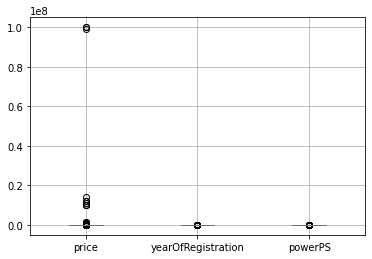

In [9]:
df_autos.boxplot(column=['price', 'yearOfRegistration', 'powerPS'])

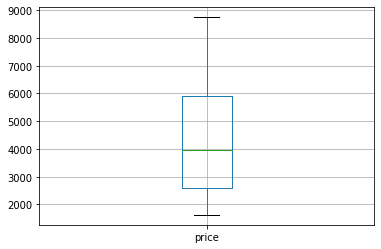

In [10]:
Q1 = df_autos['price'].quantile(0.25)
Q3 = df_autos['price'].quantile(0.75)

df_autos[(df_autos['price'] > Q1) & (df_autos['price'] < Q3)].boxplot(column=['price'])
df_autos = df_autos[(df_autos['price'] > Q1) & (df_autos['price'] < Q3)]

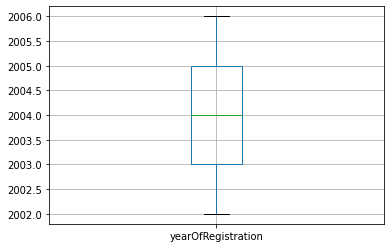

In [11]:
Q1 = df_autos['yearOfRegistration'].quantile(0.25)
Q3 = df_autos['yearOfRegistration'].quantile(0.75)

df_autos[(df_autos['yearOfRegistration'] > Q1) & (df_autos['yearOfRegistration'] < Q3)].boxplot(column=['yearOfRegistration'])
df_autos = df_autos[(df_autos['yearOfRegistration'] > Q1) & (df_autos['yearOfRegistration'] < Q3)]

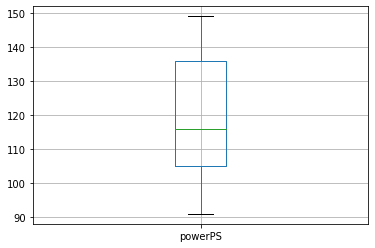

In [12]:
Q1 = df_autos['powerPS'].quantile(0.25)
Q3 = df_autos['powerPS'].quantile(0.75)

df_autos[(df_autos['powerPS'] > Q1) & (df_autos['powerPS'] < Q3)].boxplot(column=['powerPS'])
df_autos = df_autos[(df_autos['powerPS'] > Q1) & (df_autos['powerPS'] < Q3)]

In [13]:
df_autos.count(), df_autos_save.count()

(dateCrawled            28111
 name                   28111
 seller                 28111
 offerType              28111
 price                  28111
 abtest                 28111
 vehicleType            28111
 yearOfRegistration     28111
 gearbox                28111
 powerPS                28111
 model                  28111
 kilometer              28111
 monthOfRegistration    28111
 fuelType               28111
 brand                  28111
 notRepairedDamage      28111
 dateCreated            28111
 nrOfPictures           28111
 postalCode             28111
 lastSeen               28111
 dtype: int64,
 dateCrawled            371528
 name                   371528
 seller                 371528
 offerType              371528
 price                  371528
 abtest                 371528
 vehicleType            333659
 yearOfRegistration     371528
 gearbox                351319
 powerPS                371528
 model                  351044
 kilometer              371528
 monthOfRegis

# Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

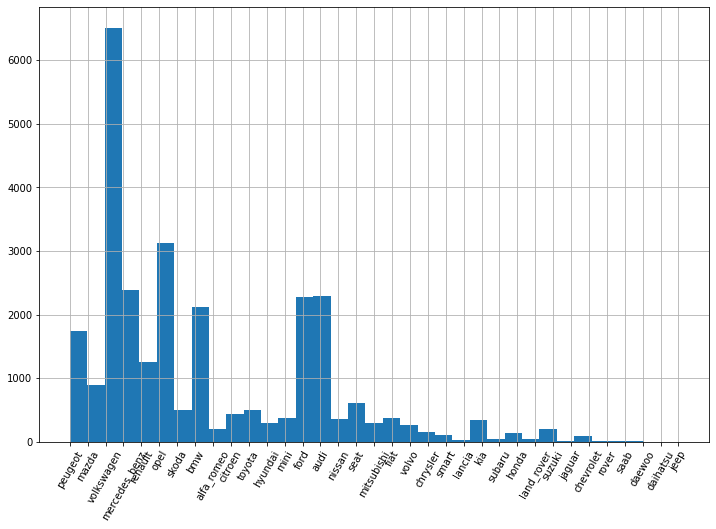

In [14]:
rcParams['figure.figsize'] = 12, 8
df_autos.brand.hist(bins=len(df_autos.brand.unique()))
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

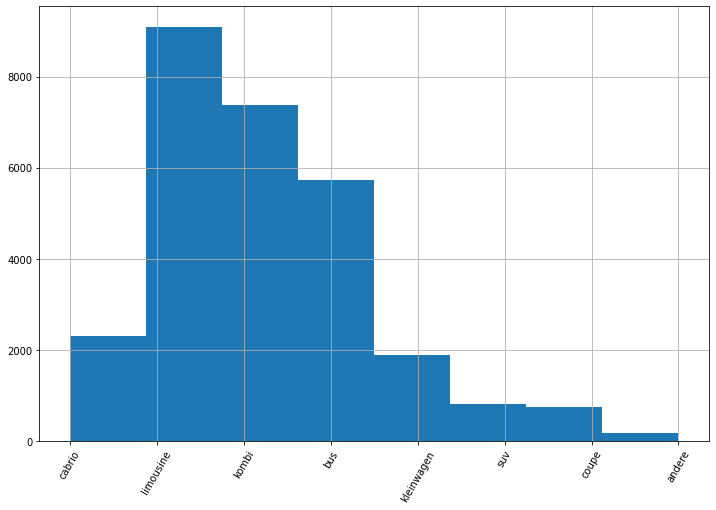

In [15]:
rcParams['figure.figsize'] = 12, 8
df_autos.vehicleType.hist(bins=len(df_autos.vehicleType.unique()))
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

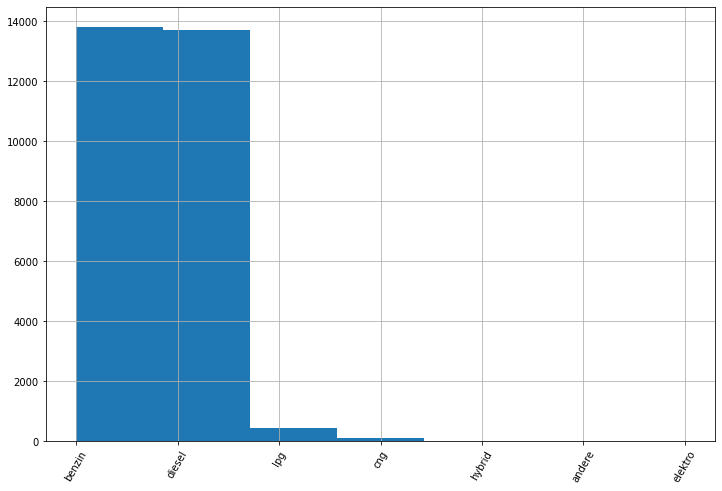

In [16]:
rcParams['figure.figsize'] = 12, 8
df_autos.fuelType.hist(bins=len(df_autos.fuelType.unique()))
plt.xticks(rotation=60)

# Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [17]:
df_autos['name_len'] = df_autos['name'].apply(len)
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,name_len
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,27
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,...,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34,17
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,...,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,45
19,2016-04-01 22:55:47,Mercedes_Benz_A_160_Classic_Klima,privat,Angebot,1850,test,bus,2004,manuell,102,...,150000,1,benzin,mercedes_benz,nein,2016-04-01 00:00:00,0,49565,2016-04-05 22:46:05,33
34,2016-03-17 18:55:12,Mercedes_Benz_E_200_CDI_Automatik_Classic,privat,Angebot,3500,control,limousine,2004,automatik,122,...,150000,11,diesel,mercedes_benz,nein,2016-03-17 00:00:00,0,67071,2016-03-30 15:46:10,41


# Постройте карту корреляций между признаками. Выведите также числовые значения признаков.

In [27]:
encoder = LabelEncoder()
df_autos['num_vehicleType'] = encoder.fit_transform(df_autos['vehicleType'])
df_autos.corr()['price']['num_vehicleType']

-0.019662207790095507

In [18]:
df_autos.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,name_len
price,1.000000,0.448167,0.223623,-0.211407,0.076971,NaN,0.022099,0.056729
yearOfRegistration,0.448167,1.000000,0.029151,-0.089965,0.018877,NaN,-0.003568,0.058374
powerPS,0.223623,0.029151,1.000000,0.109113,0.012840,NaN,0.022675,0.037712
kilometer,-0.211407,-0.089965,0.109113,1.000000,-0.010993,NaN,-0.001032,0.026521
monthOfRegistration,0.076971,0.018877,0.012840,-0.010993,1.000000,NaN,-0.004444,0.027074
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,0.022099,-0.003568,0.022675,-0.001032,-0.004444,NaN,1.000000,-0.068068
name_len,0.056729,0.058374,0.037712,0.026521,0.027074,NaN,-0.068068,1.000000


<AxesSubplot:>

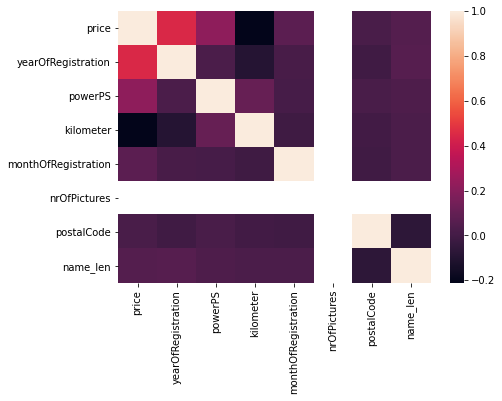

In [19]:
rcParams['figure.figsize'] = 7, 5
sns.heatmap(df_autos.corr())

# Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Постройте плотность распределения признаков.

In [20]:
df_autos = pd.get_dummies(df_autos, columns=['vehicleType'])
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,...,lastSeen,name_len,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,2004,manuell,109,2_reihe,...,2016-04-05 18:18:39,27,0,0,1,0,0,0,0,0
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,2004,manuell,105,3_reihe,...,2016-04-06 10:45:34,17,0,0,0,0,0,0,1,0
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,2005,manuell,140,passat,...,2016-04-07 10:25:17,45,0,0,0,0,0,1,0,0
19,2016-04-01 22:55:47,Mercedes_Benz_A_160_Classic_Klima,privat,Angebot,1850,test,2004,manuell,102,a_klasse,...,2016-04-05 22:46:05,33,0,1,0,0,0,0,0,0
34,2016-03-17 18:55:12,Mercedes_Benz_E_200_CDI_Automatik_Classic,privat,Angebot,3500,control,2004,automatik,122,e_klasse,...,2016-03-30 15:46:10,41,0,0,0,0,0,0,1,0


In [21]:
spearman_corr = df_autos.corr(method='spearman')
spearman_corr['price']['vehicleType_bus':'vehicleType_suv']

vehicleType_bus           0.043555
vehicleType_cabrio        0.046943
vehicleType_coupe        -0.011535
vehicleType_kleinwagen   -0.070655
vehicleType_kombi        -0.079725
vehicleType_limousine     0.024433
vehicleType_suv           0.083786
Name: price, dtype: float64

In [22]:
pearson_corr = df_autos.corr(method='pearson')
pearson_corr['price']['vehicleType_bus':'vehicleType_suv']

vehicleType_bus           0.041087
vehicleType_cabrio        0.047204
vehicleType_coupe        -0.012531
vehicleType_kleinwagen   -0.073478
vehicleType_kombi        -0.071308
vehicleType_limousine     0.020751
vehicleType_suv           0.082063
Name: price, dtype: float64

<AxesSubplot:ylabel='Density'>

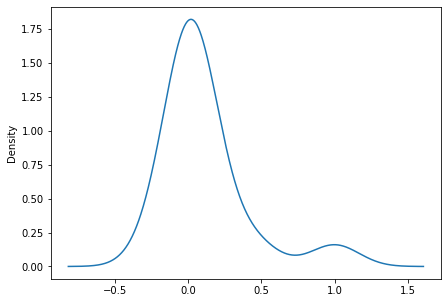

In [23]:
pearson_corr['price'].plot.kde()

# Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [24]:
df_autos['year+kilometer'] = df_autos['yearOfRegistration'] + df_autos['kilometer']
df_autos

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,...,name_len,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,year+kilometer
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,2004,manuell,109,2_reihe,...,27,0,0,1,0,0,0,0,0,152004
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,2004,manuell,105,3_reihe,...,17,0,0,0,0,0,0,1,0,152004
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,2005,manuell,140,passat,...,45,0,0,0,0,0,1,0,0,152005
19,2016-04-01 22:55:47,Mercedes_Benz_A_160_Classic_Klima,privat,Angebot,1850,test,2004,manuell,102,a_klasse,...,33,0,1,0,0,0,0,0,0,152004
34,2016-03-17 18:55:12,Mercedes_Benz_E_200_CDI_Automatik_Classic,privat,Angebot,3500,control,2004,automatik,122,e_klasse,...,41,0,0,0,0,0,0,1,0,152004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371466,2016-03-08 20:43:20,GOLF_V_1.9_TDI_GT_SPORT_BI_XENON__NAVI_DVD_ROT,privat,Angebot,3000,control,2006,manuell,105,golf,...,46,0,0,0,0,0,0,1,0,152006
371488,2016-03-15 01:51:20,Mercedes_Benz_Mercedes_Sportcoupe_CLC_180,privat,Angebot,2999,test,2003,manuell,143,andere,...,41,0,0,0,1,0,0,0,0,152003
371491,2016-03-15 20:25:20,Volkswagen_Passat_2.0_Executive,privat,Angebot,3200,test,2002,manuell,116,passat,...,31,0,0,0,0,0,0,1,0,152002
371506,2016-03-20 18:47:59,Volkswagen_Golf_1.9_TDI_DPF_Goal_Rentnerfzg._1...,privat,Angebot,5900,test,2006,manuell,105,golf,...,50,0,0,0,0,0,0,1,0,152006


In [25]:
df_autos_save.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [26]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28111 entries, 6 to 371510
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   dateCrawled             28111 non-null  object
 1   name                    28111 non-null  object
 2   seller                  28111 non-null  object
 3   offerType               28111 non-null  object
 4   price                   28111 non-null  int64 
 5   abtest                  28111 non-null  object
 6   yearOfRegistration      28111 non-null  int64 
 7   gearbox                 28111 non-null  object
 8   powerPS                 28111 non-null  int64 
 9   model                   28111 non-null  object
 10  kilometer               28111 non-null  int64 
 11  monthOfRegistration     28111 non-null  int64 
 12  fuelType                28111 non-null  object
 13  brand                   28111 non-null  object
 14  notRepairedDamage       28111 non-null  object
 15  d